In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
df = pd.read_csv('Main.csv')
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [32]:
df.shape

(35, 6)

In [33]:
df.isnull().sum()

Area Name                      0
Illiterate                     0
Graduate & above               0
Total - Population             0
Percentage Illiterate          0
Percentage Graduate & above    0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Name                    35 non-null     object 
 1   Illiterate                   35 non-null     int64  
 2   Graduate & above             35 non-null     int64  
 3   Total - Population           35 non-null     int64  
 4   Percentage Illiterate        35 non-null     float64
 5   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [35]:
df.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [36]:
df_new = df[['Illiterate', 'Graduate & above', 'Total - Population']]
df_new.head()

,Illiterate,Graduate & above,Total - Population
0,3378518,385463,12541302
1,963742,267936,6864602
2,4886265,979525,27743338
3,175200,91276,1055450
4,1929236,525301,10086292


## Model without scaling

[2.181577510938726e+16, 7834324839283269.0, 3845927347271821.0, 1541317850108221.8, 1050675316406559.0, 711030018846697.1, 532875035398534.06, 383802926583511.6]


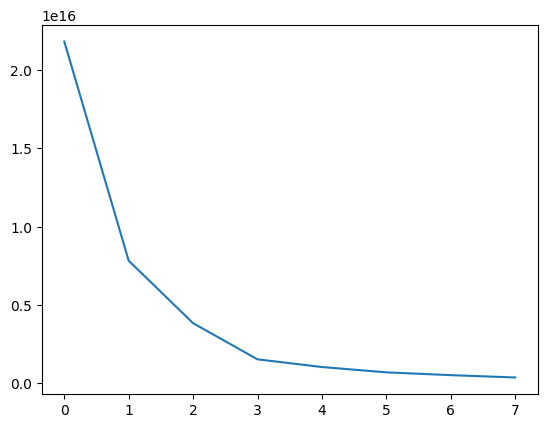

In [37]:
num_clusters = [2,3,4,5,6,7,8,9]
ssd = []

for num in num_clusters:
    kmeans = KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(df_new)
    
    ssd.append(kmeans.inertia_)
    
## plot the ssd
print(ssd)
plt.plot(ssd)

In [38]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_new)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [39]:
df_new['cluster_id'] = kmeans.labels_
df_new.head()

,Illiterate,Graduate & above,Total - Population,cluster_id
0,3378518,385463,12541302,0
1,963742,267936,6864602,0
2,4886265,979525,27743338,0
3,175200,91276,1055450,0
4,1929236,525301,10086292,0


<AxesSubplot: xlabel='cluster_id', ylabel='Illiterate'>

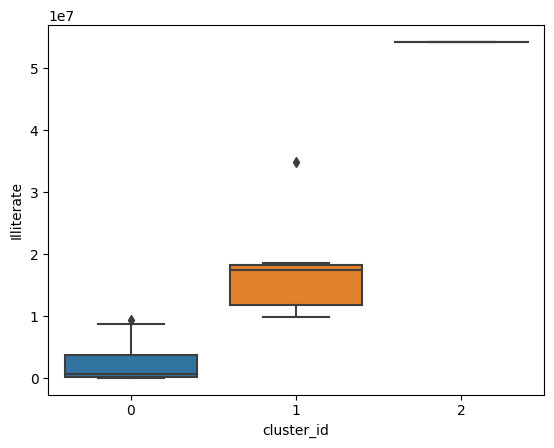

In [40]:
sns.boxplot(data=df_new, x='cluster_id', y='Illiterate')

<AxesSubplot: xlabel='cluster_id', ylabel='Graduate & above'>

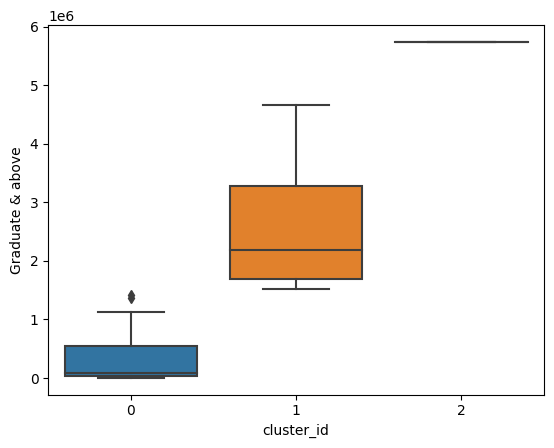

In [41]:
sns.boxplot(data=df_new, x='cluster_id', y='Graduate & above')

## scaling 

In [42]:
df_new.drop('cluster_id', axis=1, inplace=True)

In [43]:
df_new.head()

,Illiterate,Graduate & above,Total - Population
0,3378518,385463,12541302
1,963742,267936,6864602
2,4886265,979525,27743338
3,175200,91276,1055450
4,1929236,525301,10086292


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
## instantiate
scaler = StandardScaler()

## fit_transforabsm
df_scaled = scaler.fit_transform(df_new)


In [46]:
df_new.columns

Index(['Illiterate', 'Graduate & above', 'Total - Population'], dtype='object')

In [47]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Illiterate', 'Graduate & above', 'Total - Population']

In [48]:
df_scaled.head()

,Illiterate,Graduate & above,Total - Population
0,-0.384782,-0.500111,-0.503383
1,-0.600888,-0.585328,-0.632950
2,-0.249850,-0.069368,-0.156405
3,-0.671456,-0.713421,-0.765541
4,-0.514483,-0.398717,-0.559417


In [49]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [50]:
df_scaled['cluster_id'] = kmeans.labels_
df_scaled.head()

,Illiterate,Graduate & above,Total - Population,cluster_id
0,-0.384782,-0.500111,-0.503383,0
1,-0.600888,-0.585328,-0.632950,0
2,-0.249850,-0.069368,-0.156405,0
3,-0.671456,-0.713421,-0.765541,0
4,-0.514483,-0.398717,-0.559417,0


<AxesSubplot: xlabel='cluster_id', ylabel='Illiterate'>

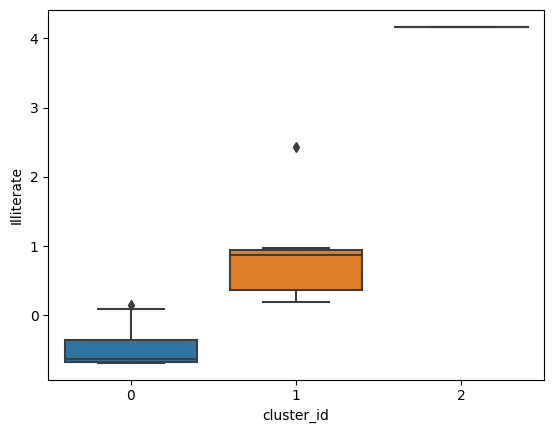

In [51]:
sns.boxplot(data=df_scaled, x='cluster_id', y='Illiterate')

<AxesSubplot: xlabel='cluster_id', ylabel='Graduate & above'>

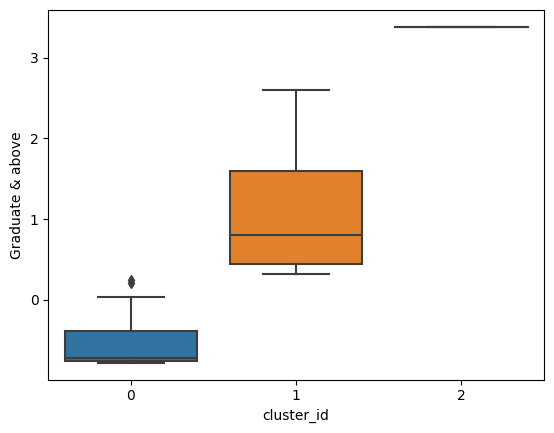

In [52]:
sns.boxplot(data=df_scaled, x='cluster_id', y='Graduate & above')